# Taller gradiente descendente

## Juan Pablo Grisales Botero
## Cristian Rodriguez
## Diego Sanabria

In [1]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
from matplotlib import pyplot as plt

Carga de datos base:

In [3]:
tam = 300
x = np.linspace(0,5,tam)
t = np.sin(2*np.pi*x)+np.random.normal(0,0.4,tam)

1- Muestre la señal $t$ en un gráfico.

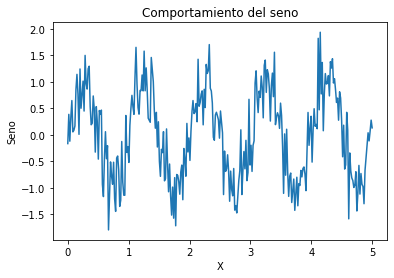

In [4]:
plt.plot(x,t)
plt.title("Comportamiento del seno")
plt.xlabel("X")
plt.ylabel("Seno")
plt.show()

2- Usando mínimos cuadrados desarrolle para cada una de las tres de funciones base una solución que se ajuste a la señal mostrada en el punto anterior. Defina los valores de m y s en cada uno de los tres casos. Realice un gráfico comparativo para cada $\hat{t}$ vs t, y uno final de todas las $\hat{t}$s vs t. Muestré los errores de cada $\hat{t}$. Use subplot. ¿Que puede intepretar de los resultados? (1.2)

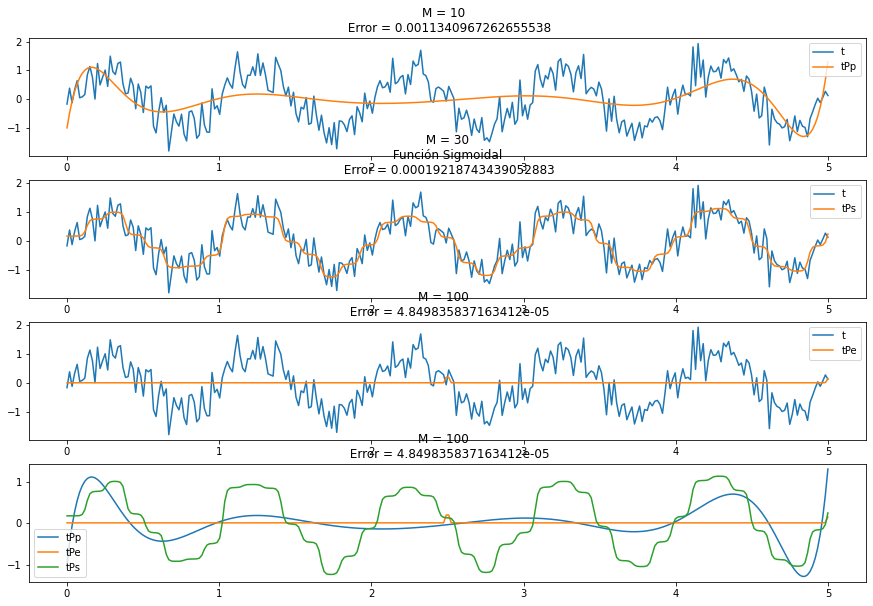

In [34]:
def polinomial(x,i):

    return x**i

def exponencial(x,u):
    
    if u == 0:
        
        return 1
    
    else:
        
        return np.exp(-(((x-u) ** 2)/(2*(0.007**2))))
    

def sigmoidal(x,u):
    if u == 0:
        return 1
    
    else:
        a = ((x-u)/0.01)
        return 1/(1+ np.exp(-a))

    
def generarDelphi (x,u,funcion):
    phi = np.zeros((len(x),len(u)))
    
    for i in range (x.size):
        
        for j in range (u.size):
            phi[i][j] = funcion(x[i],u[j])
        
    return phi


def generarW (phi,t):
    return   (np.linalg.inv(( phi.T @ phi )) @ phi.T ) @ t

def calcularError (t, tP):
    suma=0
    
    for i in range (0,len(t)):
        suma = suma + ( tP[i] - t[i] ) ** 2
        return (1/(2*len(t))) * suma

    
def generarTPpolinomial (m,t):
    i = np.arange(m)
    phi = generarDelphi(x,i,polinomial)
    w = generarW(phi,t)
    tP = phi @ w
    return tP , w


def generarTPexponencial (m,t):
    u = np.linspace(0,5,m)
    phi = generarDelphi(x,u,exponencial)
    w = generarW(phi,t)
    tP = phi @ w
    return tP , w


def generarTPsigmoidal (m,t):
    u = np.linspace(0,5,m)
    phi = generarDelphi(x,u,sigmoidal)
    w = generarW(phi,t)
    tP = phi @ w
    return tP , w

tPp , wP = generarTPpolinomial (12,t)
errorTp = calcularError (t,tPp)

tPs , wS = generarTPsigmoidal (40,t)
errorTs = calcularError (t,tPs)

tPe , wE = generarTPexponencial (3,t)
errorTe = calcularError (t,tPe)



plt.subplots(4,1,figsize=(15,10))
plt.suptitle("")

plt.subplot(4,1,1)
plt.plot(x,t,x,tPp)
plt.legend(['t','tPp'])
plt.title("M = 10, Funcion Polinomial  Error = " + str(errorTp))

plt.subplot(4,1,2)
plt.plot(x,t,x,tPs)
plt.legend(['t','tPs'])
plt.title("M = 30 Función Sigmoidal Error = " + str(errorTs))

plt.subplot(4,1,3)
plt.plot(x,t,x,tPe)
plt.legend(['t','tPe'])
plt.title("M = 100, Error = " + str(errorTe))

plt.subplot(4,1,4)
plt.plot(x,tPp,x,tPe,x,tPs)
plt.legend(['tPp','tPe','tPs'])
plt.title("M = 100  \n Error = " + str(errorTe))

plt.show()


3- Ahora programe una función para generar $w$ y $\hat{t}$ usando el algoritmo de gradiente descendente. Defina el caso de parada usando un error esperado y cantidad máxima de iteraciones (debe manejar ambos casos). Recuerde que la ecuación para calcular $w$ esta dada por:

$w_{j} = w_{j} - \alpha \Delta$

Retorne $w$, $\hat{t}$, el número de iteraciones y el error obtenido. (1.2). Una solución ideal no debe usar todas las iteraciones.

In [15]:
def generarGradiente(phi,errEsp,w,tP):
  
    cont = 0
    
    while calcularError(t,tP) >= errEsp and cont <= 10000:
        
        for i in range(len(w)):
                
            w[i] = w[i] - ( 0.0002 * cacularD(tP, t, phi[:,i]))
                
        tP = phi @ w
        
        cont += 1
        
        if (cont % 10000) == 0:
            
            print("... iteracion: "+str(cont))  
            
    error=calcularError(t,tP)        
    
    return tprima, cont, w, error

def cacularD(tprima, t,x):
    
    suma= np.sum((tprima-t) * x)
    
    return suma

                                              


4- Usando las tres funciones base con los mismos $m$ obtenidos en el punto $2$, calcule $\hat{t}$ usando gradiente descendente y responda. 

¿Cuantas iteraciones tomó para el calculo de $w$?. 
¿Qué tan cerca quedo del $w$ generado con mínimos cuadrados?

Grafique los resultados obtenido realizando la comparación de t y $\hat{t}$. Muestre el número de interaciones, M y el error. (1.2)

5- Ahora haga el mismo ejercicio del punto 4 pero con $\phi$ normalizada. Compare las iteraciones, el error y $w$. Que puede intepretar de los resultados. (1.4)